In [1]:
pip install pandas scikit-learn matplotlib seaborn nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np


In [3]:
# Text processing
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91995\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Correct file path
# Update file path with the correct .csv extension
file_path = r"C:\Users\91995\Downloads\archive (4)\IMDB Dataset.csv"



In [23]:
# Read the csv file
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [27]:
# 2. **Preprocessing the Text Data**

# Function to preprocess the reviews
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = ''.join([char if char.isalpha() else ' ' for char in text.lower()])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [26]:
# Apply the preprocessing to the review column
df['cleaned_review'] = df['review'].apply(preprocess_text)


In [28]:
# Preview the cleaned reviews
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


In [29]:
# 3. **TF-IDF Vectorization**

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews
X = tfidf_vectorizer.fit_transform(df['cleaned_review'])

In [30]:
# 4. **Prepare the Target Variable**

# Assuming the 'sentiment' column contains the labels (1 = positive, 0 = negative)
y = df['sentiment']

In [31]:
# 5. **Splitting the Dataset into Training and Test Sets**

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# 6. **Train the Logistic Regression Model**

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

In [33]:
# Train the model using the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
# 7. **Make Predictions and Evaluate the Model**

# Predict sentiment on the test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



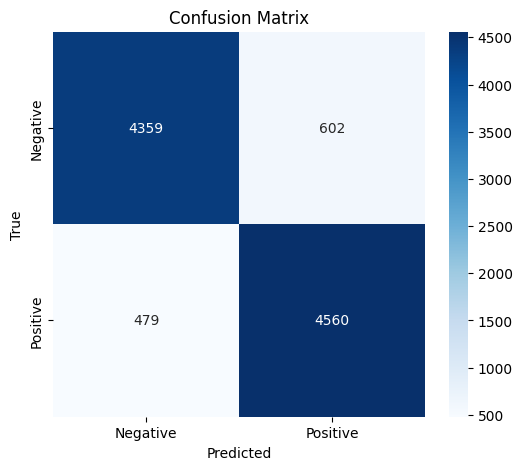

In [42]:
#from sklearn.metrics import confusion_matrix
#import seaborn as sns
#import matplotlib.pyplot as plt

# Assuming `y_test` is your true labels and `y_pred` is the model's predictions
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
